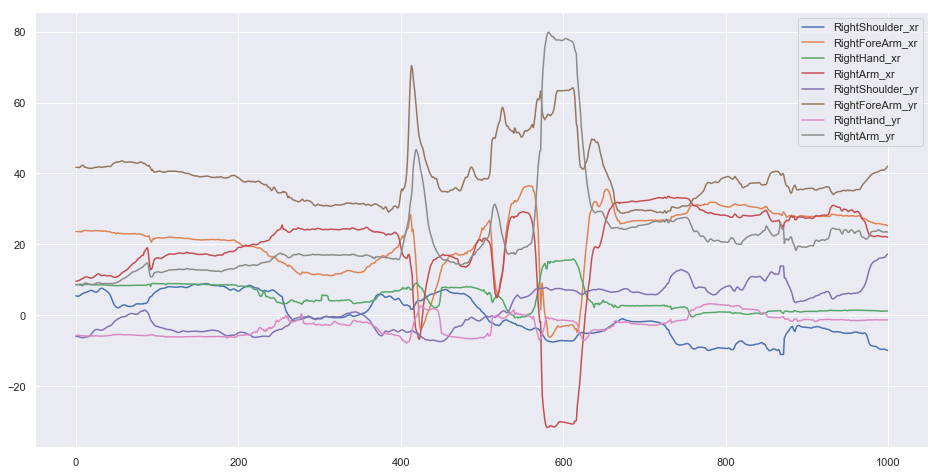

In [8]:
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns; sns.set()
%matplotlib inline
from pandas import read_csv
import pandas as pd
ru = pd.read_csv('C:/Users/lll/Documents/motion/data/csv_data/RightUpbody_transfer.csv')
nh = pd.read_csv('C:/Users/lll/Documents/motion/data/csv_data/Neck_Head_transfer.csv')                   
plt.figure(figsize=(16,8))
plt.plot(ru['RightShoulder_xr'][:1000], label = 'RightShoulder_xr')
plt.plot(ru["RightForeArm_xr"][:1000], label = 'RightForeArm_xr')
plt.plot(ru["RightHand_xr"][:1000], label = 'RightHand_xr')  
plt.plot(ru["RightArm_xr"][:1000], label = 'RightArm_xr') 
plt.plot(ru['RightShoulder_zr'][:1000], label = 'RightShoulder_yr')
plt.plot(ru["RightForeArm_yr"][:1000], label = 'RightForeArm_yr')
plt.plot(ru["RightHand_yr"][:1000], label = 'RightHand_yr')  
plt.plot(ru["RightArm_yr"][:1000], label = 'RightArm_yr') 
#plt.plot(nh["Head_zr"][2000:3000], label = '肘L')
#plt.plot(orgin_neck["X"], label = 'origin_neck')

plt.legend()
plt.show()

C:\Users\lll\AppData\Local\conda\conda\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


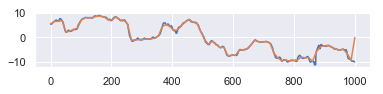

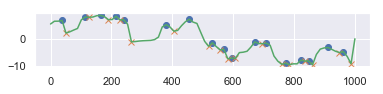

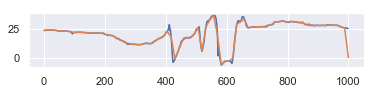

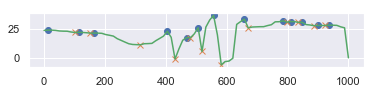

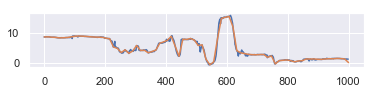

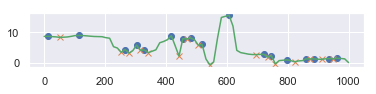

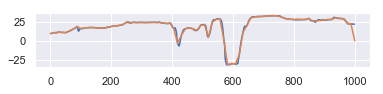

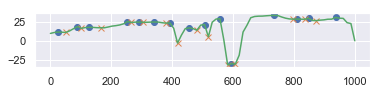

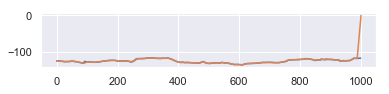

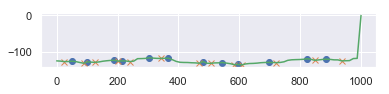

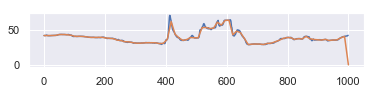

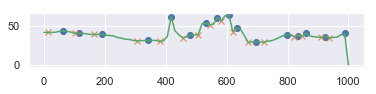

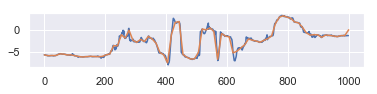

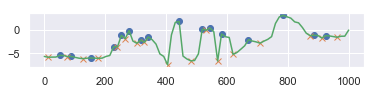

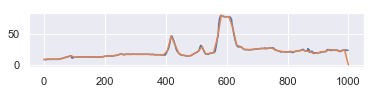

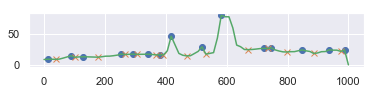

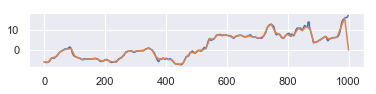

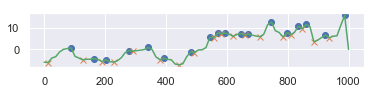

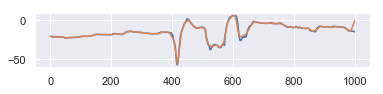

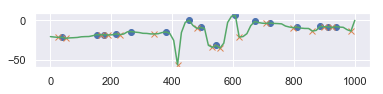

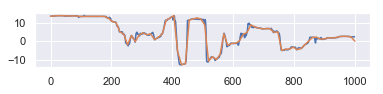

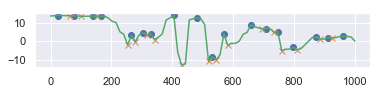

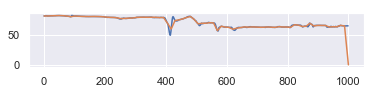

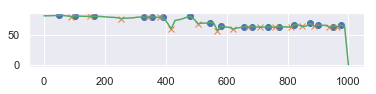

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.interpolate import spline

len_x = 1000

joint_name = ['RightShoulder_xr','RightForeArm_xr','RightHand_xr','RightArm_xr','RightShoulder_yr','RightForeArm_yr','RightHand_yr','RightArm_yr',
                'RightShoulder_zr','RightForeArm_zr','RightHand_zr','RightArm_zr']

array = np.zeros([12,len_x])
for i, name in enumerate(joint_name):
    array[i]=ru[name][:len_x]
# list_x = np.arange(len_x)
# array_RightShoulder_xr= ru['RightShoulder_xr'][:len_x]
# array_RightForeArm_xr= ru['RightForeArm_xr'][:len_x]
# array_RightHand_xr= ru['RightHand_xr'][:len_x]
# array_RightArm_xr= ru['RightArm_xr'][:len_x]
# array_RightShoulder_yr= ru['RightShoulder_yr'][:len_x]
# array_RightForeArm_yr= ru['RightForeArm_yr'][:len_x]
# array_RightHand_yr= ru['RightHand_yr'][:len_x]
# array_RightArm_yr= ru['RightArm_yr'][:len_x]
# array_RightShoulder_zr= ru['RightShoulder_zr'][:len_x]
# array_RightForeArm_zr= ru['RightForeArm_zr'][:len_x]
# array_RightHand_zr= ru['RightHand_zr'][:len_x]
# array_RightArm_zr= ru['RightArm_zr'][:len_x]

import scipy.signal as signal
from sklearn import preprocessing

def smoothing(joint,list_x):   
    # Local variables
    x = []
    y = []


    x_sm =list_x
    y_sm =joint

    x_smooth = np.linspace(0,1000, 80)
    y_smooth = spline(x_sm, y_sm, x_smooth)


    plt.figure(figsize=(6,1))
    plt.plot(list_x,joint)
    plt.plot(x_smooth,y_smooth)
    plt.show()
    return x_smooth,y_smooth
    
def max_min(x_smooth,y_smooth):
    #print (x_smooth[signal.argrelextrema(y_smooth, np.greater)])
    #print (x_smooth[signal.argrelextrema(y_smooth, np.less)])
    #print (signal.argrelextrema(y_smooth, np.greater))
    #print (signal.argrelextrema(y_smooth, np.less))
    plt.figure(figsize=(6,1))
    plt.plot(x_smooth[signal.argrelextrema(y_smooth,np.greater)[0]],y_smooth[signal.argrelextrema(y_smooth, np.greater)],'o')
    plt.plot(x_smooth[signal.argrelextrema(y_smooth,np.less)[0]],y_smooth[signal.argrelextrema(y_smooth, np.less)],'x')
    plt.plot(x_smooth,y_smooth)

    plt.show()
def scale(joint):
    max_abs_scaler = preprocessing.MaxAbsScaler()
    scaled = max_abs_scaler.fit_transform(joint)
    return scaled
for i,joint in enumerate(joint_name):
    #scaled = scale([array[i]])
    x_smooth,y_smooth = smoothing(array[i],list_x)
    max_min(x_smooth,y_smooth)
    


C:\Users\lll\AppData\Local\conda\conda\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


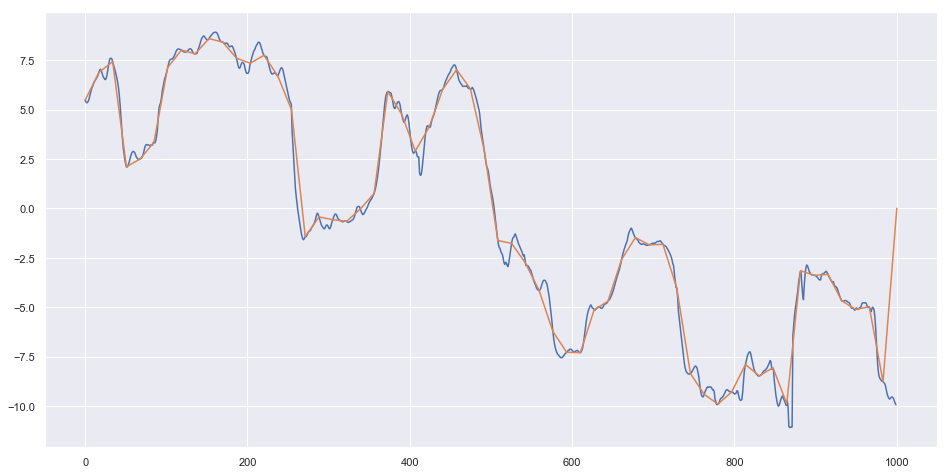

'array_RightArm_zr'